<a href="https://colab.research.google.com/github/WolkerDias/Jokenpo-PyTorch/blob/main/Redes_Neurais_Jokenpo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamos começar criando a estrutura de diretórios

#Estrutura de diretórios:
```
.
└── content
    └── dataset
        └── imagens
            ├── imagem1.jpg
            ├── imagem2.jpg
            └── imagem3.jpg
```



In [1]:
%mkdir dataset dataset/imagens

In [2]:
%cd dataset/imagens

/content/dataset/imagens


# Download dos dados
Vamos utilizar a base de dados (Rock Paper Scissors Dataset) disponivel no site https://laurencemoroney.com/datasets.html

Observe que o conjunto de dados contém imagens de várias mãos, de diferentes raças, idades e sexos, colocadas em Pedra / Papel ou Tesoura e rotuladas como tal. As imagens estão divididas em pastas, mais como estamos criando nossa própria estrutura de diretórios, vamos descompactar tudo no mesmo lugar e separar em conjuntos de treino, teste e validação via código, pois nem sempre vamos encontrar um dataset já estruturado como este.

In [3]:
#conjunto de treinamento
!curl -L  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip > rps.zip; unzip -j rps.zip; rm rps.zip #use unzip -j para descompactar tudo no mesmo diretorio

#conjunto de teste
!curl -L  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip > rps-test-set.zip; unzip -j rps-test-set.zip; rm rps-test-set.zip #use unzip -j para descompactar tudo no mesmo diretorio

#conjunto de validação
!curl -L  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-validation.zip > rps-validation.zip; unzip -j rps-validation.zip; rm rps-validation.zip #use unzip -j para descompactar tudo no mesmo diretorio

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  191M  100  191M    0     0   102M      0  0:00:01  0:00:01 --:--:--  102M
Archive:  rps.zip
  inflating: paper01-000.png         
  inflating: paper01-001.png         
  inflating: paper01-002.png         
  inflating: paper01-003.png         
  inflating: paper01-004.png         
  inflating: paper01-005.png         
  inflating: paper01-006.png         
  inflating: paper01-007.png         
  inflating: paper01-008.png         
  inflating: paper01-009.png         
  inflating: paper01-010.png         
  inflating: paper01-011.png         
  inflating: paper01-012.png         
  inflating: paper01-013.png         
  inflating: paper01-014.png         
  inflating: paper01-015.png         
  inflating: paper01-016.png         
  inflating: paper01-017.png         
  inflating: paper01-018.png         
  inflating: paper01-01

Vamos trabalhar com imagens com um único formato (.jpg) para padronizar as entradas no nosso modelo. Além disso, precisamos renomear as imagens para posteriormente criar nosso arquivo .csv que deverá conter o nome da imagem e o rótulo 0, 1 ou 2 que que representam respectivamente pedra, papel, ou tesoura. 

In [4]:
import os
import PIL.ImageOps    
from PIL import Image

#definir um contador que servirá para não renomear imagens com o mesmo nome.
cont = 0

#pegar todos os nomes das imagens e atribuir à variavel imagens
imagens = os.listdir('./') 

#ordenar as imagens pelo nome
imagens.sort() 

#percorrer todas as imagens padronizando-as no tamanho 96x96 e colocando um fundo branco caso alguma imagem possua fundo transparente
for nome_img in imagens:
  #print(nome_img)
  #nome = './' + nome_img[:-4]
  #img.save(nome) 
  rgba_image = Image.open(nome_img)
  rgba_image.resize((96,96), Image.ANTIALIAS)
  rgba_image.load()

  #criando um fundo branco que será usado caso alguma imagem possua fundo transparente.
  background = Image.new("RGB", rgba_image.size, (255, 255, 255))

  try:
    background.paste(rgba_image, mask = rgba_image.split()[3])
    image = background.resize((96,96), Image.ANTIALIAS)
  except:
    image = rgba_image.resize((96,96), Image.ANTIALIAS)
  
  #Como os nomes no Dataset possui padronização para treino e teste vamos usar a função find() para procurar o rotulo da imagem para renomea-las
  if (nome_img.find('rock') > -1):
    nome = 'pedra'
  elif (nome_img.find('paper') > -1):
    nome = 'papel'
  elif (nome_img.find('scissors') > -1):
    nome = 'tesoura'

#salvando as imagens no padrão rotulo-NNNN.jpg
  image.save('{}-{:04d}.jpg'.format(nome, cont), "JPEG", quality=100)

  #incrementando o contador para que uma imagem não tenha o mesmo nome de outra já renomeada
  cont = cont + 1

Após criar nossas imagens no formato .jpg, podemos excluir todas as imagens .png usando o comando abaixo

In [5]:
%rm ./*.png

# Criando o arquivo para rotular as imagens

Vamos criar o nosso arquivo imagens.csv que conterá o caminho relativo da imagem, e sua etiqueta separada por vírgula. A primeira linha consiste no título das colunas.


Exemplo:
```
Caminho,Label
imagem1.jpg,0
imagem2.jpg,1
imagem3.jpg,2
```

vamos começar criando um arquivo .txt contendo todos os nomes que definimos para os aquivos na etapa anterior

In [6]:
# cria um .txt com todos os nomes de arquivos no diretório /dataset/imagens
!ls ./ > ../lista.txt

In [7]:
# Abrir o arquivo em modo de leitura

with open('../lista.txt', 'r') as fd:
  # lendo o arquivo txt e passando todos os dados para a variavel txt
  txt = fd.readlines()  

  #criando uma lista vazia
  txt_list = [] 
  
  #criando o cabeçalho do nosso arquivo
  txt_list.append('Caminho,Label') 

#Novamente usando a função find(), vamos verificar se existe uma palavra especifica e criar o rotulo a partir do nome da imagem. 
for linha in txt:  
  if (linha.find('pedra') == 0):
    char = '0'
  elif (linha.find('papel') == 0):
    char = '1'
  elif (linha.find('tesoura') == 0):
    char = '2'
  txt_list.append(linha[:-1] + ',' + char)
  

# Abrir o arquivo em modo de escrita
with open('../imagens.csv', 'w') as fd:
    fd.write('\n'.join(txt_list))  # Escrever texto modificado

# Criação de um conjunto de dados personalizado

A seguir, vamos criar um conjunto de dados personalizado no Pytorch. 
Nesta etapa, já temos as imagens de sinais de pedra, papel e tesoura em um diretório e um arquivo csv contendo o nome do arquivo em jpg e o rótulo.

Podemos criar uma classe Dataset personalizada criando uma subclasse da classe PyTorch Dataset. Ao criar uma classe de Dataset personalizada, precisa definir duas funções essenciais: `__len__` e `__getitem__`. A função `__len__` retorna o comprimento do conjunto de dados. Esta função pode ser chamada com a função Python len. A função `__getitem__` retorna uma imagem no índice especificado.

1. Vamos criar um conjunto de dados personalizado PyTorch para nossos dados:







In [8]:
# Primeiro, carregaremos os pacotes necessários
import torch
import torch.nn as nn  # Todos os módulos de rede neural, nn.Linear, nn.Conv2d, BatchNorm, funções de perda
import torch.optim as optim  # Para todos os algoritmos de otimização, SGD, Adam, etc.
import torchvision.transforms as transforms  # Transformações que podemos realizar em nosso conjunto de dados
import torchvision
import os
import pandas as pd
from skimage import io
from torch.utils.data import (
    Dataset,
    DataLoader,
) # Facilita o gerenciamento do conjunto de dados e cria minilotes

# Defina a classe Jokenpo:
class Jokenpo(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        """
         Retornar o tamanho do conjunto de dados
        """
        return len(self.annotations)

    def __getitem__(self, index):
        """
          Retorna uma imagem no índice especificado
        """
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = io.imread(img_path)
        y_label = torch.tensor(self.annotations.iloc[index, 1]) 
        y_label = y_label.item()
        if self.transform:
            image = self.transform(image)

        return (image, y_label)


In [9]:
# Definir dispositivo ("cuda" para usar a GPU ou "cpu" para maquinas sem GPU )
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

2. Em seguida, definiremos um objeto do conjunto de dados personalizado para a pasta de treino

In [10]:
#retornando para o diretório raiz
%cd ../..

/content


In [11]:
#criando um objeto que contém o caminho do nosso arquivo de rotulos e também das imagens

jokenpo_dataset = Jokenpo(
    csv_file="./dataset/imagens.csv",
    root_dir="./dataset/imagens",
    transform=transforms.ToTensor(),
)
print(len(jokenpo_dataset))

2925


3. Em seguida, carregaremos uma imagem usando o conjunto de dados personalizado:

Podemos ver que o conjunto de dados retorna imagens no formato (canais, altura, largura)e os valores de pixel são normalizados para o intervalo [0,0, 1,0]. Este é o resultado de `transforms.ToTensor()` que converte uma imagem PIL no intervalo [0, 255] para `torch.FloatTensor` e deforma (C x H x W) no intervalo [0,0, 1,0]. É comum usar esta formatação ao trabalhar com imagens em PyTorch.

In [12]:
# carregue uma imagem
img,label=jokenpo_dataset[20]
print(img.shape,torch.min(img),torch.max(img))

torch.Size([3, 96, 96]) tensor(0.0706) tensor(1.)


Vamos criar uma lista com os nomes das classes, assim será possivel identificar o resultado pelo nome através do indice

In [13]:
classes = ['pedra','papel','tesoura']
print(classes)

['pedra', 'papel', 'tesoura']


# Dividindo o conjunto de dados

Precisamos fornecer um conjunto de dados de validação para rastrear o desempenho do modelo durante o treinamento. Usaremos 20% do `jokenpo_dataset` como conjunto de dados de validação e o restante como conjunto de dados de treinamento.

## 1. Vamos dividir o conjunto de dados jokenpo_dataset em treinamento e validação:

In [14]:
from torch.utils.data import random_split

len_jokenpo_dataset=len(jokenpo_dataset)
len_train=int(0.8*len_jokenpo_dataset)
len_val=len_jokenpo_dataset-len_train

train_ds,val_ds=random_split(jokenpo_dataset,[len_train,len_val])

print("comprimento do conjunto de dados de treino:", len(train_ds))
print("comprimento do conjunto de dados de validação:", len(val_ds))


comprimento do conjunto de dados de treino: 2340
comprimento do conjunto de dados de validação: 585


## 2. Podemos obter uma imagem do conjunto de dados de treinamento:

In [15]:
for x,y in train_ds:
    print(x.shape,classes[y])
    break

torch.Size([3, 96, 96]) papel


## 3. Também obteremos uma imagem do conjunto de dados de validação:

In [16]:
for x,y in val_ds:
    print(x.shape,classes[y])
    break

torch.Size([3, 96, 96]) papel


## 4. Vamos exibir alguns exemplos de train_ds.

índices de imagem: [1653  835  763 1731]
torch.Size([3, 100, 394])


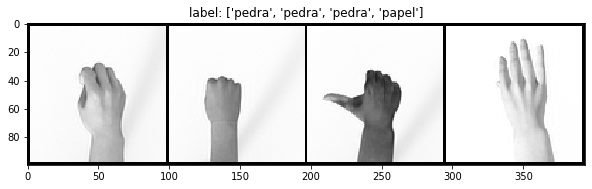

In [17]:
from torchvision import utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)

# Definindo uma função auxiliar para mostrar uma imagem:
def show(img,y,color=False):
    # converter tensor em matriz numpy
    npimg = img.numpy()
   
    # Converter para a forma H*W*C
    npimg_tr=np.transpose(npimg, (1,2,0))
    

    if color==False:
        npimg_tr=npimg_tr[:,:,0]
        plt.imshow(npimg_tr,interpolation='nearest',cmap="gray")
    else:
        # exibir imagens
        plt.imshow(npimg_tr,interpolation='nearest')
    c = [classes[i] for i in y]
    plt.title("label: "+str(c))

# Criando uma grade de imagens de amostra
grid_size=4
rnd_inds=np.random.randint(0,len(train_ds),grid_size)
print("índices de imagem:",rnd_inds)

x_grid_train=[train_ds[i][0] for i in rnd_inds]
y_grid_train=[train_ds[i][1] for i in rnd_inds]

x_grid_train=utils.make_grid(x_grid_train, nrow=4, padding=2)
print(x_grid_train.shape)

# Chame a função auxiliar para exibir a grade:
plt.rcParams['figure.figsize'] = (10.0, 5)
show(x_grid_train, y_grid_train)

## 5. Também podemos mostrar alguns exemplos de val_ds:

índices de imagem: [359   9 277  70]
torch.Size([3, 100, 394])


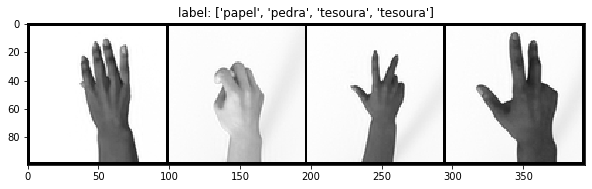

In [18]:
grid_size=4
rnd_inds=np.random.randint(0,len(val_ds),grid_size)
print("índices de imagem:",rnd_inds)
x_grid_val=[val_ds[i][0] for i in range(grid_size)]
y_grid_val=[val_ds[i][1] for i in range(grid_size)]

x_grid_val=utils.make_grid(x_grid_val, nrow=4, padding=2)
print(x_grid_val.shape)

show(x_grid_val,y_grid_val)

# Transformando os dados

A transformação e o aumento da imagem são necessários para o treinamento de modelos de aprendizagem profunda. Usando transformações de imagem, podemos expandir nosso conjunto de dados ou redimensionar e normalizar para obter um melhor desempenho do modelo. As transformações típicas incluem inversão horizontal e vertical, rotação e redimensionamento. A boa notícia é que podemos usar várias transformações de imagem para nosso modelo de classificação binária sem alterar o rótulo. Por exemplo, se girarmos ou invertermos uma imagem de classe 0, ela permanecerá como 0. Vamos usar a transformação da imagem durante o treinamento.

## 1. Primeiro, vamos definir as seguintes transformações para o conjunto de dados de treinamento:

In [19]:
train_transformer = transforms.Compose([
    # Invertendo a imagem horizontalmente e verticalmente
    # com uma probabilidade de 0,5
    transforms.RandomHorizontalFlip(p=0.5),  
    transforms.RandomVerticalFlip(p=0.5),

    # Girando as imagens na faixa de [-45,45] graus.  
    transforms.RandomRotation(45),         

    # Cortando uma imagem quadrada aleatoriamente na faixa de [72, 96] 
    # e redimensionando para o tamanho original de 96 * 96.
    #transforms.RandomResizedCrop(96,scale=(0.8,1.0),ratio=(1.0,1.0)),

    # Normalizando as imagens no intervalo [0, 1] e converta-os em tensores
    transforms.ToTensor()])             

## 2. Para o conjunto de dados de validação, não precisamos de nenhum aumento. Então, nós apenas convertemos as imagens em tensores na função de transformações:

In [21]:
val_transformer = transforms.Compose([transforms.ToTensor()])     

## 3. Depois de definir as transformações, substituímos as funções de transformação de train_ds e val_ds:

In [22]:
# sobrescrever as funções de transformação
train_ds.transform=train_transformer
val_ds.transform=val_transformer

# Criando Dataloaders

Precisamos escrever um código para fazer um loop em conjuntos de dados e extrair um lote de dados. Este processo pode ser feito automaticamente usando um Dataloader PyTorch.

Ao definir um PyTorch Dataloader, precisamos definir o `batch_size` (tamanho do lote). O `batch_size` determina o número de imagens a serem extraídas do conjunto de dados em cada iteração. Os valores típicos do `batch_size` para tarefas de classificação estão na faixa de [8-128]. Além disso, observe que não precisamos embaralhar os dados de validação durante a avaliação.

In [23]:
from torch.utils.data import DataLoader
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=64, shuffle=False)  

## 2. Em seguida, obtemos um lote de dados do dataloader de treinamento:

In [24]:
for x, y in train_dl:
    print(x.shape)
    print(y.shape)
    break


torch.Size([32, 3, 96, 96])
torch.Size([32])


## 3. Depois, obtemos um lote de dados do dataloader de validação:

In [25]:
for x, y in val_dl:
    print(x.shape)
    print(y.shape)
    break

torch.Size([64, 3, 96, 96])
torch.Size([64])


# Construindo o modelo de classificação

Nosso modelo é composto por quatro redes neurais convolucionais ( CNNs ) e duas camadas totalmente conectadas, conforme mostrado no diagrama a seguir:
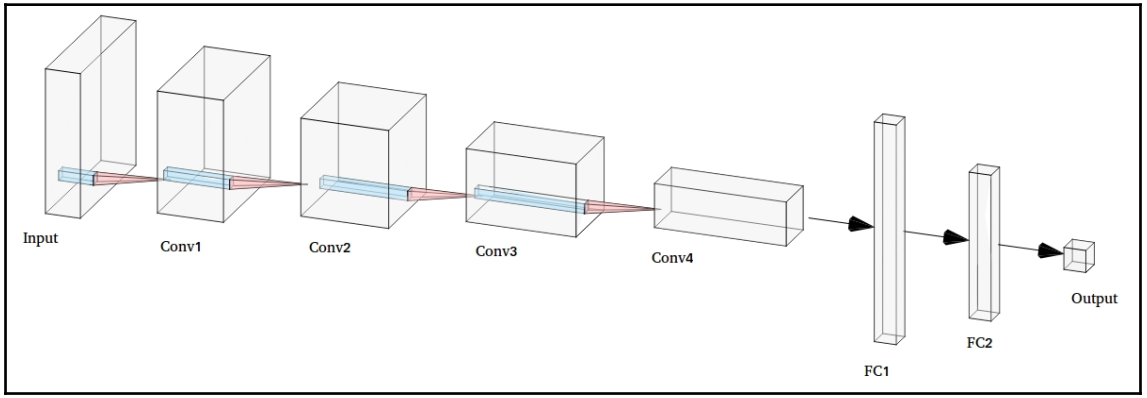


Como podemos ver, existem quatro camadas convolucionais e duas camadas totalmente conectadas no modelo. Após cada camada convolucional, existe uma camada de pooling. As camadas de pooling não são mostrado no diagrama anterior. As camadas convolucionais processam a imagem de entrada e extrai um vetor de característica, que é alimentado para as camadas totalmente conectadas. Existe uma camada de saída para a classificação.

# Criando modelo

##  1. Vamos implementar uma função auxiliar para calcular o tamanho da saída de uma camada CNN.

Desenvolveremos `findConv2DOutShape` para calcular automaticamente o tamanho da saída de uma CNN e camada de pool. As entradas para esta função são:
* H_in : um inteiro que representa a altura dos dados de entrada
* W_in : um inteiro que representa a largura dos dados de entrada
* conv : um objeto da camada CNN
* pool : um inteiro que representa o tamanho do pool e o padrão é 2

A função recebe o tamanho de entrada, H_in , W_in e camada conv e fornece o tamanho de saída, H_out , W_out . A fórmula para calcular o tamanho da saída é fornecida no seguinte link: https://pytorch.org/docs/stable/nn.html

In [26]:
import torch.nn as nn

def findConv2dOutShape(H_in,W_in,conv,pool=2):

    """
      Calcula automaticamente o tamanho da saída de uma CNN e camada de pool. 
      As entradas para esta função são:
        * H_in : um inteiro que representa a altura dos dados de entrada
        * W_in : um inteiro que representa a largura dos dados de entrada
        * conv : um objeto da camada CNN
        * pool : um inteiro que representa o tamanho do pool e o padrão é 2
    """
    # obter argumentos de conv
    kernel_size=conv.kernel_size
    stride=conv.stride
    padding=conv.padding
    dilation=conv.dilation

    # Ref: https://pytorch.org/docs/stable/nn.html
    H_out=np.floor((H_in+2*padding[0]-dilation[0]*(kernel_size[0]-1)-1)/stride[0]+1)
    W_out=np.floor((W_in+2*padding[1]-dilation[1]*(kernel_size[1]-1)-1)/stride[1]+1)

    if pool:
        H_out/=pool
        W_out/=pool
    return int(H_out),int(W_out)


# examplo
conv1 = nn.Conv2d(3, 8, kernel_size=3)
h,w=findConv2dOutShape(96,96,conv1)
print(h,w)

47 47


## 2. A seguir, implementaremos o modelo CNN usando a classe nn.Module.

Na função `__init__`, definimos as camadas do modelo. Nós fornecemos os parâmetros do modelo como um dicionário Python para esta função. Recomendamos o uso de variáveis ​​para os parâmetros do modelo e um dicionário para defini-los fora da classe. Desta forma, no caso de mudanças de parâmetros, nós não precisaremos fazer alterações dentro da classe Net. Isso também fará futuras pesquisas de hiperparâmetros mais fáceis.

Na função forward, usamos as camadas definidas para delinear o modelo. Nós usamos nn.Conv2d e nn.Linear para definir o CNN e as camadas totalmente conectadas, respectivamente.As camadas de pooling, ativações e camadas dropout agem como funções e podem ser definidas usando nn.functional. Não precisamos definir essas camadas na função `__init__`.

In [27]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, params):
        super(Net, self).__init__()
    
        C_in,H_in,W_in=params["input_shape"]
        init_f=params["initial_filters"] 
        num_fc1=params["num_fc1"]  
        num_classes=params["num_classes"] 
        self.dropout_rate=params["dropout_rate"] 
        
        self.conv1 = nn.Conv2d(C_in, init_f, kernel_size=3)
        h,w=findConv2dOutShape(H_in,W_in,self.conv1)
        
        self.conv2 = nn.Conv2d(init_f, 2*init_f, kernel_size=3)
        h,w=findConv2dOutShape(h,w,self.conv2)
        
        self.conv3 = nn.Conv2d(2*init_f, 4*init_f, kernel_size=3)
        h,w=findConv2dOutShape(h,w,self.conv3)

        self.conv4 = nn.Conv2d(4*init_f, 8*init_f, kernel_size=3)
        h,w=findConv2dOutShape(h,w,self.conv4)
        
        # calcule o tamanho do achatamento
        self.num_flatten=h*w*8*init_f
        
        self.fc1 = nn.Linear(self.num_flatten, num_fc1)
        self.fc2 = nn.Linear(num_fc1, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)

        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2, 2)

        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, 2, 2)
        
        x = x.view(-1, self.num_flatten)
        
        x = F.relu(self.fc1(x))
        x=F.dropout(x, self.dropout_rate)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


## 3. Então, vamos construir um objeto da classe Net:

In [28]:
# Dicionário Python para definir os parâmeteros do modelo
params_model={
        "input_shape": (3,96,96),
        "initial_filters": 8,    
        "num_fc1": 1000,
        "dropout_rate": 0.25,
        "num_classes": 3,
            }

# criar modelo
cnn_model = Net(params_model)


## 4. Mova o modelo para um dispositivo cuda , se disponível:

In [29]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    cnn_model=cnn_model.to(device) 

## 5. Imprima o modelo:

In [30]:
print(cnn_model)

Net(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1024, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=3, bias=True)
)


## 6. Verifique o modelo do dispositivo:

In [31]:
print(next(cnn_model.parameters()).device)

cuda:0


## 7. Vamos obter um resumo do modelo:

In [32]:
from torchsummary import summary
summary(cnn_model, input_size=(3, 96, 96))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 94, 94]             224
            Conv2d-2           [-1, 16, 45, 45]           1,168
            Conv2d-3           [-1, 32, 20, 20]           4,640
            Conv2d-4             [-1, 64, 8, 8]          18,496
            Linear-5                 [-1, 1000]       1,025,000
            Linear-6                    [-1, 3]           3,003
Total params: 1,052,531
Trainable params: 1,052,531
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.11
Forward/backward pass size (MB): 0.92
Params size (MB): 4.02
Estimated Total Size (MB): 5.04
----------------------------------------------------------------


# Definindo a função de perda

A função de perda padrão para tarefas de classificação é a perda de entropia cruzada ou logloss. Contudo, ao definir a função de perda, precisamos considerar o número de saídas do modelo e suas funções de ativação.
Vamos usar a função `log_softmax`, pois é mais fácil expandir para a classificação de várias classes. PyTorch combina as operações log e softmax em uma função devido à estabilidade numérica e velocidade.

Usamos `log_softmax` como a saída e `nn.NLLLoss` como a perda de probabilidade de log negativo. Um argumento importante na definição da função de perda a ser observada é a redução, que especifica a redução a ser aplicada ao produto. Existem três opções para escolher: nenhum, soma e média. Escolhemos `reduction = "sum"` para que a perda de saída seja somada. Como processaremos os dados em lotes, isso retornará a soma dos valores de perda por lote de dados.

In [33]:
loss_func = nn.NLLLoss(reduction="sum")

# Definindo o otimizador

In [34]:
from torch import optim
opt = optim.Adam(cnn_model.parameters(), lr=3e-4)

In [35]:
# obter taxa de aprendizado
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']

current_lr=get_lr(opt)
print('current lr={}'.format(current_lr))


current lr=0.0003


In [36]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

# definir o agendador de taxa de aprendizado
lr_scheduler = ReduceLROnPlateau(opt, mode='min',factor=0.5, patience=20,verbose=1)

# Treinamento e Avaliação

In [37]:
def metrics_batch(output, target):
    # obter classe de saída
    pred = output.argmax(dim=1, keepdim=True)
    
    # comparar a classe de saída com a classe de destino
    corrects=pred.eq(target.view_as(pred)).sum().item()
    return corrects

In [38]:
def loss_batch(loss_func, output, target, opt=None):
    
    # obter perda
    loss = loss_func(output, target)
    
    # obter métrica de desempenho
    metric_b = metrics_batch(output,target)
    
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()

    return loss.item(), metric_b


In [39]:
# definir dispositivo como uma variável global
device = torch.device("cuda")

def loss_epoch(model,loss_func,dataset_dl,sanity_check=False,opt=None):
    running_loss=0.0
    running_metric=0.0
    len_data=len(dataset_dl.dataset)

    for xb, yb in dataset_dl:
        # mover lote para dispositivo
        xb=xb.to(device)
        yb=yb.to(device)
        
        # obter saída do modelo
        output=model(xb)
        
        # obter perda por lote
        loss_b,metric_b=loss_batch(loss_func, output, yb, opt)
        
        # atualizar perda de execução
        running_loss+=loss_b
        
        # atualizar métrica em execução
        if metric_b is not None:
            running_metric+=metric_b

        # quebrar o loop em caso de verificação de sanidade
        if sanity_check is True:
            break
    
    # valor médio de perda
    loss=running_loss/float(len_data)
    
    # valor médio da métrica
    metric=running_metric/float(len_data)
    
    return loss, metric

In [40]:
def train_val(model, params):
    # extrair parâmetros do modelo
    num_epochs=params["num_epochs"]
    loss_func=params["loss_func"]
    opt=params["optimizer"]
    train_dl=params["train_dl"]
    val_dl=params["val_dl"]
    sanity_check=params["sanity_check"]
    lr_scheduler=params["lr_scheduler"]
    path2weights=params["path2weights"]
    
    # histórico de valores de perda em cada época
    loss_history={
        "train": [],
        "val": [],
    }
    
    # histórico de valores de métrica em cada época
    metric_history={
        "train": [],
        "val": [],
    }
    
    # uma cópia profunda dos pesos para o modelo com melhor desempenho
    best_model_wts = copy.deepcopy(model.state_dict())
    
    # inicializar a melhor perda para um valor grande
    best_loss=float('inf')
    
    # laço principal
    for epoch in range(num_epochs):
        
        # obter a taxa de aprendizado atual
        current_lr=get_lr(opt)
        print('Epoch {}/{}, current lr={}'.format(epoch, num_epochs - 1, current_lr))
        
        # treinar modelo no conjunto de dados de treinamento
        model.train()
        train_loss, train_metric=loss_epoch(model,loss_func,train_dl,sanity_check,opt)

        # coletar perda e métrica para o conjunto de dados de treinamento
        loss_history["train"].append(train_loss)
        metric_history["train"].append(train_metric)
        
        # avaliar modelo no conjunto de dados de validação 
        model.eval()
        with torch.no_grad():
            val_loss, val_metric=loss_epoch(model,loss_func,val_dl,sanity_check)
        
       
        # armazenar melhor modelo
        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            
            # armazenar pesos em um arquivo local
            torch.save(model.state_dict(), path2weights)
            print("Melhores pesos de modelo copiado!")
        
        # coletar perda e métrica para conjunto de dados de validação
        loss_history["val"].append(val_loss)
        metric_history["val"].append(val_metric)
        
        # programação de taxa de aprendizado
        lr_scheduler.step(val_loss)
        if current_lr != get_lr(opt):
            print("Carregando os melhores pesos do modelo!")
            model.load_state_dict(best_model_wts) 

        print("train loss: %.6f, dev loss: %.6f, accuracy: %.2f" %(train_loss,val_loss,100*val_metric))
        print("-"*10) 

    # carregar os melhores pesos do modelo
    model.load_state_dict(best_model_wts)
        
    return model, loss_history, metric_history

In [41]:
%mkdir models

In [42]:
import copy

loss_func = nn.NLLLoss(reduction="sum")
opt = optim.Adam(cnn_model.parameters(), lr=3e-4)
lr_scheduler = ReduceLROnPlateau(opt, mode='min',factor=0.5, patience=20,verbose=1)

params_train={
 "num_epochs": 100,
 "optimizer": opt,
 "loss_func": loss_func,
 "train_dl": train_dl,
 "val_dl": val_dl,
 "sanity_check": False,
 "lr_scheduler": lr_scheduler,
 "path2weights": "./models/weights.pt",
}


# treinar e validar o modelo
cnn_model,loss_hist,metric_hist=train_val(cnn_model,params_train)

Epoch 0/99, current lr=0.0003
Melhores pesos de modelo copiado!
train loss: 1.023140, dev loss: 0.762573, accuracy: 72.99
----------
Epoch 1/99, current lr=0.0003
Melhores pesos de modelo copiado!
train loss: 0.399932, dev loss: 0.183607, accuracy: 94.36
----------
Epoch 2/99, current lr=0.0003
Melhores pesos de modelo copiado!
train loss: 0.122320, dev loss: 0.099846, accuracy: 96.75
----------
Epoch 3/99, current lr=0.0003
Melhores pesos de modelo copiado!
train loss: 0.074856, dev loss: 0.086470, accuracy: 96.75
----------
Epoch 4/99, current lr=0.0003
Melhores pesos de modelo copiado!
train loss: 0.041281, dev loss: 0.057850, accuracy: 97.78
----------
Epoch 5/99, current lr=0.0003
Melhores pesos de modelo copiado!
train loss: 0.024384, dev loss: 0.034539, accuracy: 98.80
----------
Epoch 6/99, current lr=0.0003
Melhores pesos de modelo copiado!
train loss: 0.014989, dev loss: 0.020942, accuracy: 99.32
----------
Epoch 7/99, current lr=0.0003
train loss: 0.011287, dev loss: 0.02359

In [ ]:
#!cp ./models/weights.pt /content/drive/MyDrive/models/weights_jokenpo.pt

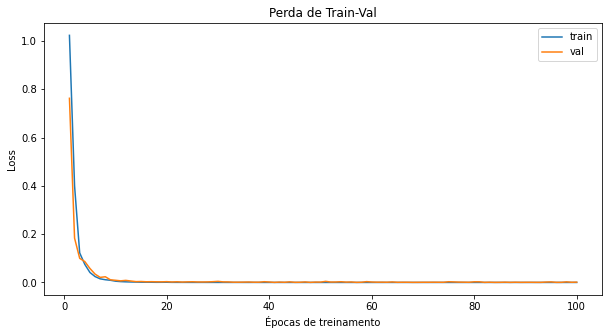

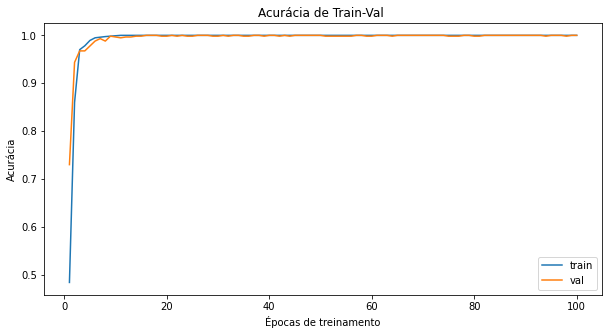

In [46]:
# Progresso da validação do treino
num_epochs=params_train["num_epochs"]

# plotando o progresso da perda
plt.title("Perda de Train-Val")
plt.plot(range(1,num_epochs+1),loss_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),loss_hist["val"],label="val")
plt.ylabel("Loss")
plt.xlabel("Épocas de treinamento")
plt.legend()
plt.show()

# plotando a progresso de precisão
plt.title("Acurácia de Train-Val ")
plt.plot(range(1,num_epochs+1),metric_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),metric_hist["val"],label="val")
plt.ylabel("Acurácia")
plt.xlabel("Épocas de treinamento")
plt.legend()
plt.show()

## Implantar modelos

torch.Size([3, 96, 96])
torch.Size([1, 3, 96, 96])
Previsão: papel 
Label:    papel


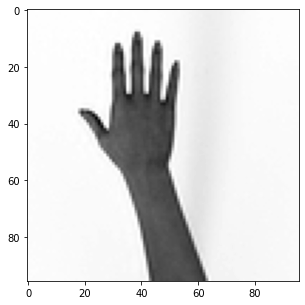

In [60]:
import matplotlib.pyplot as plt
import numpy as np
# x é um ponto de dados com formato C*H*W
n=55

x= val_ds[n][0]
y=val_ds[n][1]
print(x.shape)

# Definir dispositivo
x = x.to("cpu")
plt.imshow(x.numpy()[0],cmap="gray")

# usamos unsqueeze para expandir as dimensões para 1*C*H*W
x= x.unsqueeze(0)
print(x.shape)

# converter para torch.float32
x=x.type(torch.float)

# mover para dispositivo cuda
x=x.to(device)

# obter saída do modelo
output=cnn_model(x)

# obter de classe previsível
pred = output.argmax(dim=1, keepdim=True)
print ("Previsão:", classes[pred.item()], "\nLabel:   ", classes[y])